In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.metrics import f1_score, confusion_matrix

from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('hotel_bookings.csv')

In [3]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Data types:

Categorical - hotel, is_canceled, customer_type, is_repeated_guest, meal, country, market_segment, distribution_channel, reserved_room_type, assigned_room_type, deposit_type, agent, company, reservation_status,
Numerical - lead_time, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, previous_cancellations, booking_changes, previous_bookings_not_canceled, days_in_waiting_list, adr, required_car_parking_spaces, total_of_special_requests
Ordinal - arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, reservation_status_date

Mising values:

country
agent
company

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


The following columns previous_cancellations, previous_bookings_not_canceled, booking_changes days_in_waiting_list, required_car_parking_spaces, total_of_special_requests have only a maximum value. This shows that these features contribute to the decision of cancellation only in very few cases.

Target variable: is_canceled

EXPLORATORY DATA ANALYSIS

UNIVARIATE ANALYSIS (Checking the validity of assumptions)

In [6]:
is_can = len(df[df['is_canceled']==1])
print("Percentage cancelation= ", is_can/len(df))
df['reservation_status'].value_counts(normalize=True)*100

Percentage cancelation=  0.37041628277075134


reservation_status
Check-Out    62.958372
Canceled     36.030656
No-Show       1.010972
Name: proportion, dtype: float64

In [11]:
print("Initial data types:\n", df.dtypes)

# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Print the data types after selecting numeric columns
print("\nNumeric columns:\n", df_numeric.dtypes)

Initial data types:
 hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent        

In [12]:
# Calculate the correlation matrix and extract correlations with 'is_canceled'
corr = df_numeric.corr(method='pearson')['is_canceled']

print("\nCorrelation with 'is_canceled':\n", corr)


Correlation with 'is_canceled':
 is_canceled                       1.000000
lead_time                         0.293123
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
stays_in_week_nights              0.024765
adults                            0.060017
children                          0.005048
babies                           -0.032491
is_repeated_guest                -0.084793
previous_cancellations            0.110133
previous_bookings_not_canceled   -0.057358
booking_changes                  -0.144381
agent                            -0.083114
company                          -0.020642
days_in_waiting_list              0.054186
adr                               0.047557
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64


Highest positive correlations : lead_time followed by previous_cancellations
Most negative correlations : total_of_special_requests, required_car_parking_spaces

Cancelations in resort hotel=  0.27763354967548676
Cancelations in city hotel=  0.41726963317786464


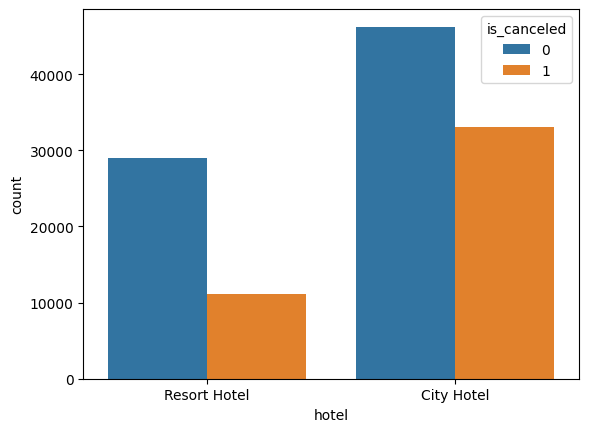

In [13]:
sns.countplot(data=df, x='hotel', hue='is_canceled')
resort_canceled = df[(df['hotel']=='Resort Hotel') & (df['is_canceled']==1)]
city_canceled = df[(df['hotel']=='City Hotel') & (df['is_canceled']==1)]
print('Cancelations in resort hotel= ', (len(resort_canceled))/(len(df[df['hotel']=='Resort Hotel'])))
print('Cancelations in city hotel= ', (len(city_canceled))/(len(df[df['hotel']=='City Hotel'])))

City Hotels have higher cancellations than resort hotels.

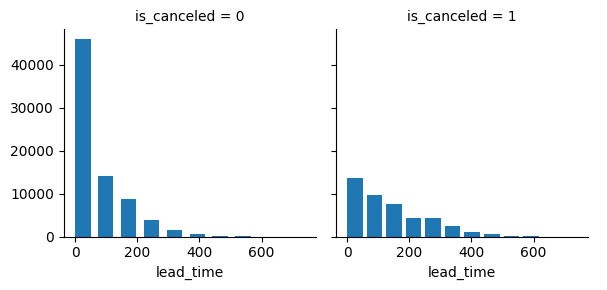

In [14]:
grid = sns.FacetGrid(df, col='is_canceled')
grid.map(plt.hist, 'lead_time', width=50)
grid.add_legend()

Maximum cancelations occur if the booking is made 60-70 days before the checkin date. Longer the lead_time, lower is the cancelation. 

In [15]:
print(len(df[(df['stays_in_weekend_nights']==0) & (df['stays_in_week_nights']==0)])) 

715


715 bookings don't have both weekday or weekend nights.

In [16]:
((len(df.loc[(df['children']!=0) | (df['babies']!=0)]))/(len(df))) * 100

7.819750397855767

The number of customers having children or babies or both are only 8% of the total population.

Cancelations among new guests=  0.3778508392455442
Cancelations among old guests=  0.14488188976377953


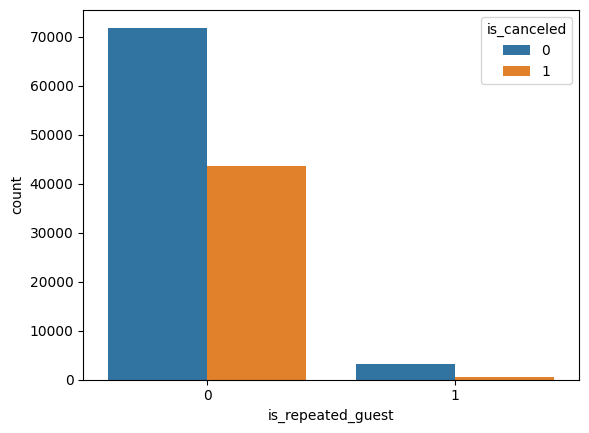

In [17]:
sns.countplot(data=df, x='is_repeated_guest', hue='is_canceled')
new_guest = df[(df['is_repeated_guest']==0) & (df['is_canceled']==1)]
old_guest = df[(df['is_repeated_guest']==1) & (df['is_canceled']==1)]
print('Cancelations among new guests= ', (len(new_guest))/(len(df[df['is_repeated_guest']==0])))
print('Cancelations among old guests= ', (len(old_guest))/(len(df[df['is_repeated_guest']==1])))

Maximum customers are new comers and they are less likely to cancel their current booking. Old guests are less likely to cancel the booking.

<Axes: xlabel='previous_cancellations', ylabel='count'>

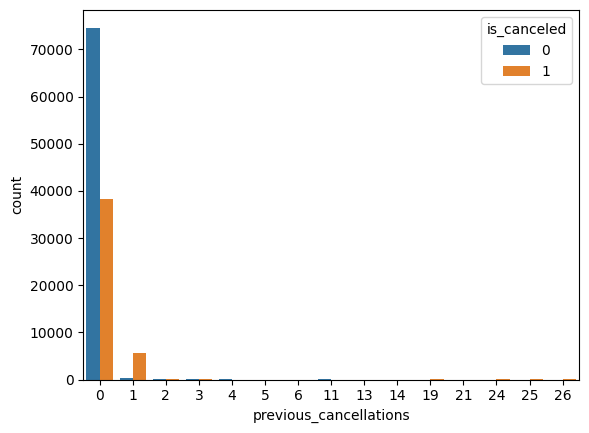

In [18]:
sns.countplot(data=df, x='previous_cancellations', hue='is_canceled')

Maximum customers have 0 previous cancellations. They are less likely to cancel the current booking. 
However, customers who have cancelled once earlier are more likely to cancel the current booking.

In [19]:
temp = df.loc[df['reserved_room_type']!=df['assigned_room_type']]
temp['is_canceled'].value_counts(normalize=True)*100

is_canceled
0    94.623584
1     5.376416
Name: proportion, dtype: float64

There are 5% cancellations in case the reserved room and the assigned rooms are different.

<Axes: xlabel='booking_changes', ylabel='is_canceled'>

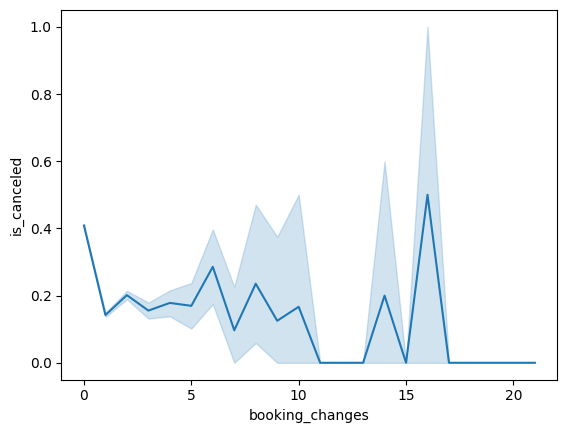

In [21]:
sns.lineplot(data=df, x='booking_changes', y='is_canceled')

There is no trend between the changes made in the booking and the cancellations.

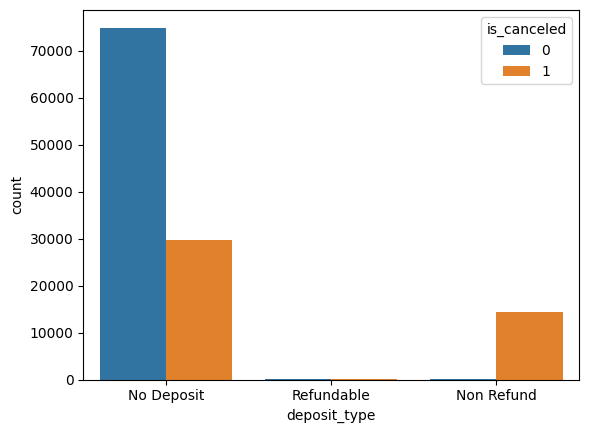

In [22]:
sns.countplot(x="deposit_type", hue="is_canceled",data=df);

Bookings that are non refundable have more cancellations than the refundable deposit type.

<Axes: xlabel='arrival_date_year', ylabel='count'>

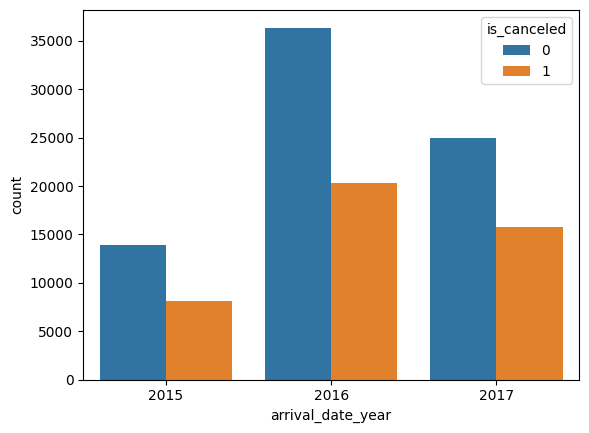

In [24]:
sns.countplot(data=df, x='arrival_date_year', hue='is_canceled')

Maximum footfall was in 2016 which also indicates that cancellaions happened in the year 2016.

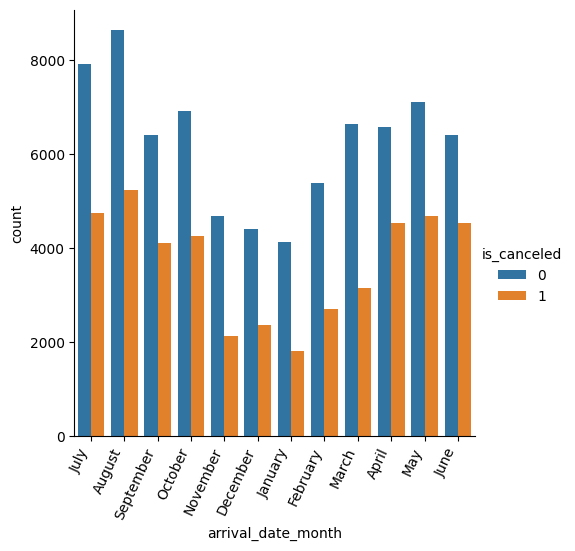

In [25]:
chart = sns.catplot(data=df, x='arrival_date_month', hue='is_canceled', kind='count')
chart.set_xticklabels(rotation=65, horizontalalignment='right')

Highest cancellations happen from May to August.

In [26]:
year_count = df.groupby(['arrival_date_year', 'is_canceled']).size().to_frame(name='count')
year_perct = year_count.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
print(year_perct)

month_count = df.groupby(['arrival_date_month', 'is_canceled']).size().to_frame(name='count')
month_perct = month_count.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
print(month_perct)

                                                     count
arrival_date_year arrival_date_year is_canceled           
2015              2015              0            62.984179
                                    1            37.015821
2016              2016              0            64.136703
                                    1            35.863297
2017              2017              0            61.302136
                                    1            38.697864
                                                       count
arrival_date_month arrival_date_month is_canceled           
April              April              0            59.202814
                                      1            40.797186
August             August             0            62.246883
                                      1            37.753117
December           December           0            65.029499
                                      1            34.970501
February           February           0 

/var/folders/pg/cvx4c76s7l57_j5v35f5vdj40000gn/T/ipykernel_79275/375043833.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  year_perct = year_count.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
/var/folders/pg/cvx4c76s7l57_j5v35f5vdj40000gn/T/ipykernel_79275/375043833.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  month_perct = month_count.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))


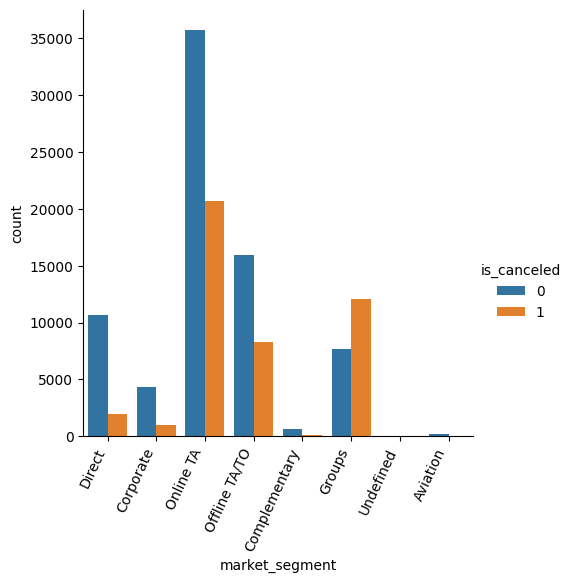

In [27]:
chart = sns.catplot(data=df, x='market_segment', kind='count', hue='is_canceled')
chart.set_xticklabels(rotation=65, horizontalalignment='right')

<Axes: xlabel='distribution_channel', ylabel='count'>

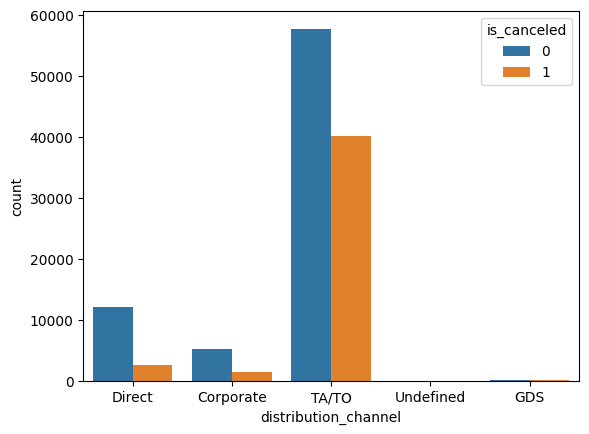

In [28]:
sns.countplot(data=df, x='distribution_channel', hue='is_canceled')

customer_type
Transient          75.059050
Transient-Party    21.043638
Contract            3.414021
Group               0.483290
Name: proportion, dtype: float64


<Axes: xlabel='customer_type', ylabel='count'>

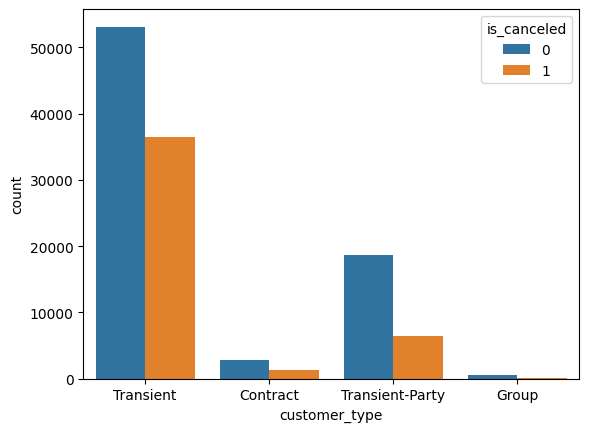

In [29]:
print(df['customer_type'].value_counts(normalize=True)*100)
sns.countplot(data=df, x='customer_type', hue='is_canceled')

Highest cancellations happen in the transient customer type.

In [30]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

MULTIVARIATE ANALYSIS

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarnin

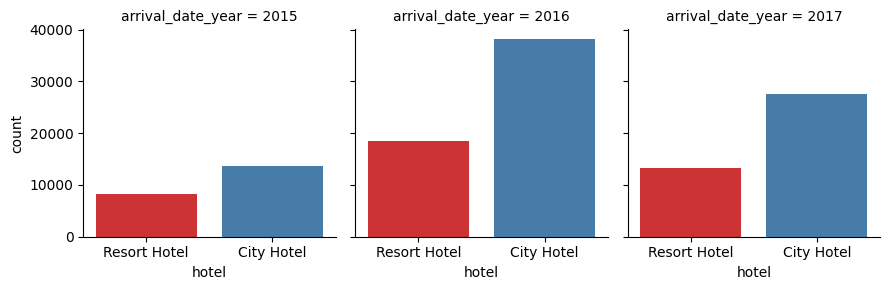

In [58]:
grid = sns.FacetGrid(df, col='arrival_date_year')
grid.map(sns.countplot, 'hotel', palette='Set1')

City Hotel has the maximum bookings for all three years.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarnin

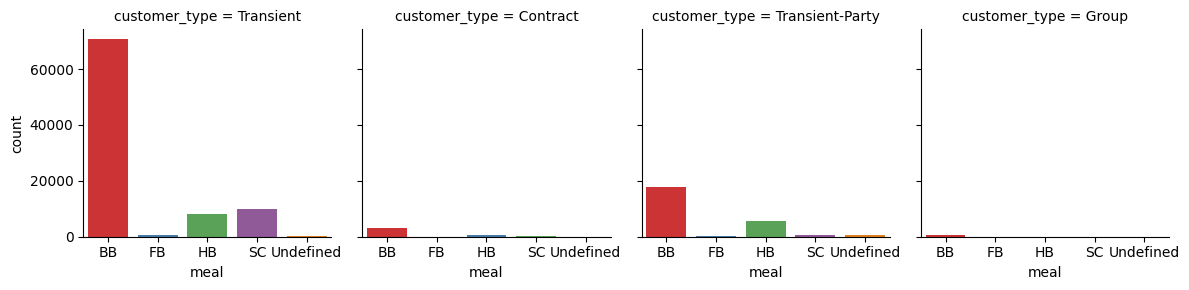

In [57]:
df['meal'].nunique(), df['customer_type'].nunique()
grid = sns.FacetGrid(df, col='customer_type')
grid.map(sns.countplot, 'meal', palette='Set1')

BB is the most prefered type of meal.

In [39]:
df.pivot_table(columns='hotel', values='country', aggfunc=lambda x:x.mode())

hotel,City Hotel,Resort Hotel
country,PRT,PRT


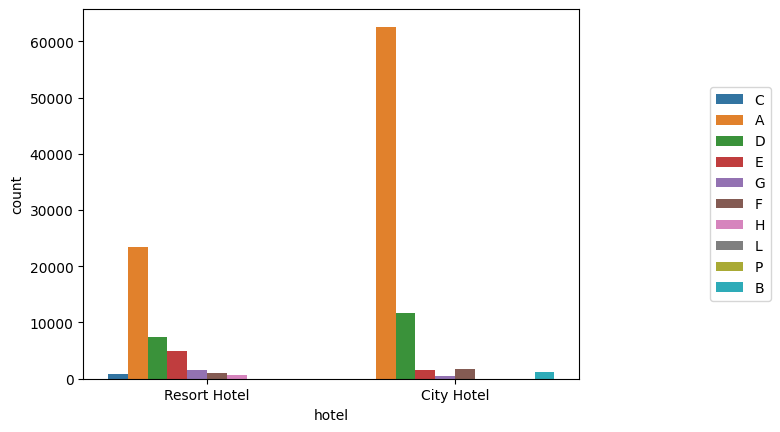

In [40]:
g = sns.countplot(data=df, x='hotel', hue='reserved_room_type')
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

Rooms prefered in Resort Hotel are A,D,E and in City Hotel are A,D, F.

In [41]:
print("TABLE 1")
print(df.groupby(['hotel', 'customer_type']).size())

TABLE 1
hotel         customer_type  
City Hotel    Contract            2300
              Group                293
              Transient          59404
              Transient-Party    17333
Resort Hotel  Contract            1776
              Group                284
              Transient          30209
              Transient-Party     7791
dtype: int64


In [42]:
print(df.groupby(['customer_type', 'deposit_type']).size())

customer_type    deposit_type
Contract         No Deposit       3530
                 Non Refund        544
                 Refundable          2
Group            No Deposit        569
                 Refundable          8
Transient        No Deposit      76684
                 Non Refund      12909
                 Refundable         20
Transient-Party  No Deposit      23858
                 Non Refund       1134
                 Refundable        132
dtype: int64


In [43]:
print(df.groupby(['customer_type', 'distribution_channel']).size())
print("-"*60)
print(df.groupby(['customer_type', 'market_segment']).size())

customer_type    distribution_channel
Contract         Corporate                  27
                 Direct                     19
                 TA/TO                    4030
Group            Corporate                  31
                 Direct                    116
                 TA/TO                     430
Transient        Corporate                4157
                 Direct                  12343
                 GDS                       193
                 TA/TO                   72919
                 Undefined                   1
Transient-Party  Corporate                2462
                 Direct                   2167
                 TA/TO                   20491
                 Undefined                   4
dtype: int64
------------------------------------------------------------
customer_type    market_segment
Contract         Complementary         2
                 Corporate            22
                 Direct               14
                 Groups     

In [44]:
print(df.groupby(['hotel', 'distribution_channel']).size())
print("-"*40)
print(df.groupby(['hotel', 'market_segment']).size())

hotel         distribution_channel
City Hotel    Corporate                3408
              Direct                   6780
              GDS                       193
              TA/TO                   68945
              Undefined                   4
Resort Hotel  Corporate                3269
              Direct                   7865
              TA/TO                   28925
              Undefined                   1
dtype: int64
----------------------------------------
hotel         market_segment
City Hotel    Aviation            237
              Complementary       542
              Corporate          2986
              Direct             6093
              Groups            13975
              Offline TA/TO     16747
              Online TA         38748
              Undefined             2
Resort Hotel  Complementary       201
              Corporate          2309
              Direct             6513
              Groups             5836
              Offline TA/TO   

In [45]:
group = df.groupby(['customer_type', 'reservation_status']).size()
group_pcts = group.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
group_pcts

customer_type    customer_type    reservation_status
Contract         Contract         Canceled              30.323847
                                  Check-Out             69.038273
                                  No-Show                0.637880
Group            Group            Canceled               9.532062
                                  Check-Out             89.774697
                                  No-Show                0.693241
Transient        Transient        Canceled              39.678395
                                  Check-Out             59.253680
                                  No-Show                1.067925
Transient-Party  Transient-Party  Canceled              24.554211
                                  Check-Out             74.570132
                                  No-Show                0.875657
dtype: float64

In [46]:
df.pivot_table(columns='hotel', values=['stays_in_weekend_nights', 'stays_in_week_nights'], aggfunc=lambda x:x.sum())

hotel,City Hotel,Resort Hotel
stays_in_week_nights,173174,125337
stays_in_weekend_nights,63082,47664


In [47]:
df.pivot_table(columns='hotel', values='total_of_special_requests', aggfunc=lambda x:x.sum())

hotel,City Hotel,Resort Hotel
total_of_special_requests,43387,24828


/var/folders/pg/cvx4c76s7l57_j5v35f5vdj40000gn/T/ipykernel_79275/3087460604.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x='hotel', y='days_in_waiting_list', jitter=False, palette='Set1')


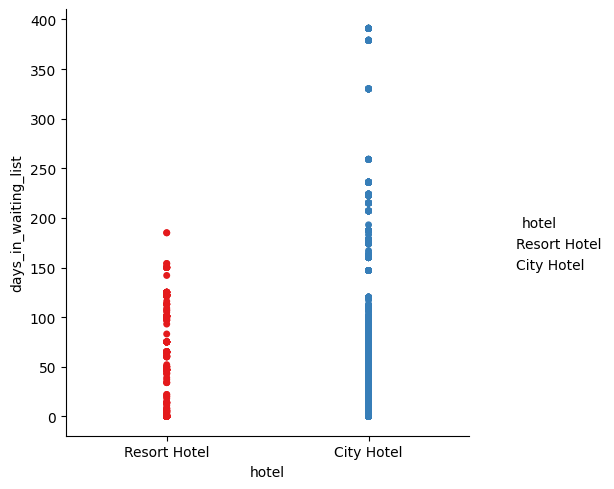

In [56]:
sns.catplot(data=df, x='hotel', y='days_in_waiting_list', jitter=False, palette='Set1')

City hotels have much larger waiting time in days compared to resort hotels which may signify that their demad is higher.

In [49]:
df['country'].value_counts(normalize=True)*100

country
PRT    40.865587
GBR    10.200838
FRA     8.759314
ESP     7.205934
DEU     6.128576
         ...    
DJI     0.000841
BWA     0.000841
HND     0.000841
VGB     0.000841
NAM     0.000841
Name: proportion, Length: 177, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarnin

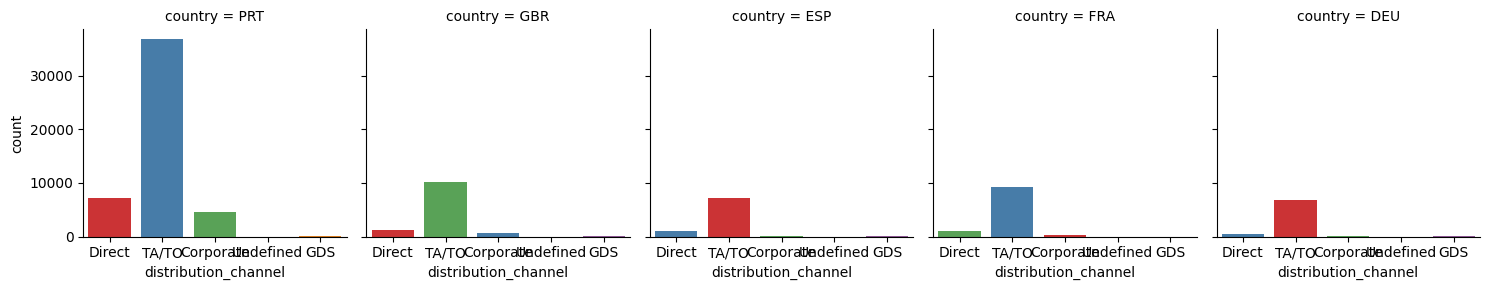

In [53]:
temp = df.loc[(df['country']=='PRT') | (df['country']=='GBR') | (df['country']=='FRA') | (df['country']=='ESP') | (df['country']=='DEU')]
grid = sns.FacetGrid(temp, col='country')
grid.map(sns.countplot, 'distribution_channel', palette='Set1')

/var/folders/pg/cvx4c76s7l57_j5v35f5vdj40000gn/T/ipykernel_79275/3561929814.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='customer_type', y='total_of_special_requests', ci=None, palette='Set1')
/var/folders/pg/cvx4c76s7l57_j5v35f5vdj40000gn/T/ipykernel_79275/3561929814.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='customer_type', y='total_of_special_requests', ci=None, palette='Set1')


<Axes: xlabel='customer_type', ylabel='total_of_special_requests'>

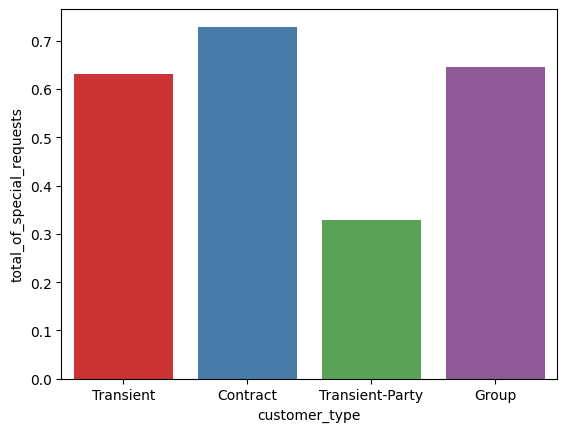

In [54]:
sns.barplot(data=df, x='customer_type', y='total_of_special_requests', ci=None, palette='Set1')

/var/folders/pg/cvx4c76s7l57_j5v35f5vdj40000gn/T/ipykernel_79275/2221964110.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='distribution_channel', y='lead_time', palette='Set1')


<Axes: xlabel='distribution_channel', ylabel='lead_time'>

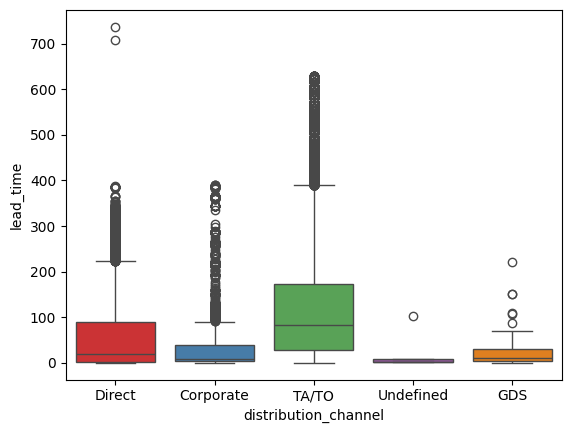

In [55]:
sns.boxplot(data=df, x='distribution_channel', y='lead_time', palette='Set1')

FEATURE ENGINEERING

In [59]:
month_map = {'January':'01', 'February':'02', 'March':'03', 'April':'04', 'May':'05', 'June':'06', 'July':'07', 'August':'08', 
             'September':'09', 'October':'10', 'November':'11', 'December':'12'}
df.arrival_date_month = df.arrival_date_month.map(month_map).astype(int)

In [60]:
df['arrival_date'] = df['arrival_date_year'].astype(str)+'-'+df['arrival_date_month'].astype(str)+'-'+df['arrival_date_day_of_month'].astype(str)

In [61]:
def roomChange(row):
    if row['assigned_room_type'] == row['reserved_room_type']:
        return False
    else:
        return True

df['change_in_room'] = df.apply(roomChange, axis=1)

In [62]:
df['children'] = df['children'].fillna(0)
df['offspring'] = (df['children'] + df['babies']).astype(int)

In [63]:
df['total_bookings'] = df['previous_cancellations'] + df['previous_bookings_not_canceled']

In [64]:
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['agent'].fillna(df['agent'].mode()[0], inplace=True)
df['company'].fillna(df['company'].mode()[0], inplace=True)

In [65]:
for i in range(len(df)):
    if df.loc[i, 'country'] == 'PRT':
        df.at[i, 'country'] = 1
    elif df.loc[i, 'country'] == 'GBR':
        df.at[i, 'country'] = 2
    else:
        df.at[i, 'country'] = 0

In [66]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

In [67]:
df['stay_duration'] = df['reservation_status_date'] - df['arrival_date']
df['stay_duration'] = df['stay_duration'] / np.timedelta64(1, 'D')
df['stay_duration'] = df['stay_duration'].astype(int)

In [68]:
for i in range(len(df)):
    if df.loc[i, 'stay_duration']<0:
        df.at[i, 'stay_duration'] = -1

In [69]:
lb = LabelEncoder()
var = ['hotel', 'customer_type', 'deposit_type', 'change_in_room', 'market_segment', 'distribution_channel', 'country']
for item in var:
    df[item] = lb.fit_transform(df[item])
df = pd.get_dummies(df, columns=['hotel', 'customer_type', 'deposit_type', 'change_in_room', 'market_segment', 'distribution_channel', 'country'])

In [70]:
df.drop(['meal', 'assigned_room_type', 'reserved_room_type', 'reservation_status', 'reservation_status_date', 'arrival_date'], axis=1, inplace=True)

MODELS AND RESULTS

In [71]:
train_var = df.drop(['is_canceled'], axis=1)
test_var = df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(train_var, test_var, test_size=0.20)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((95512, 50), (95512,), (23878, 50), (23878,))

In [72]:
#Data scaling
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_mm = mm_scaler.transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

In [73]:
#Logistic Regression
logreg = LogisticRegression(max_iter=500).fit(X_train_mm, y_train)
scores = cross_val_score(logreg, X_train_mm, y_train, cv=5)
logreg_pred = logreg.predict(X_test_mm)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(logreg.score(X_test_mm, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, logreg_pred)))
print(confusion_matrix(y_test, logreg_pred))

Average cross validation score: 0.991
Test accuracy: 0.991
F1 score: 0.987
[[15015    21]
 [  202  8640]]


In [74]:
#Linear SVC
svc = LinearSVC().fit(X_train_mm, y_train)
scores = cross_val_score(svc, X_train_mm, y_train, cv=5)
svc_pred = svc.predict(X_test_mm)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(svc.score(X_test_mm, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, svc_pred)))
print(confusion_matrix(y_test, svc_pred))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto

Average cross validation score: 0.995
Test accuracy: 0.995
F1 score: 0.993
[[15027     9]
 [  120  8722]]


In [75]:
#SGD Classifier
sgd = SGDClassifier(alpha=0.1).fit(X_train_std, y_train)
scores = cross_val_score(sgd, X_train_std, y_train, cv=5)
sgd_pred = sgd.predict(X_test_std)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(sgd.score(X_test_std, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, sgd_pred)))
print(confusion_matrix(y_test, sgd_pred))

Average cross validation score: 0.988
Test accuracy: 0.987
F1 score: 0.982
[[15023    13]
 [  306  8536]]


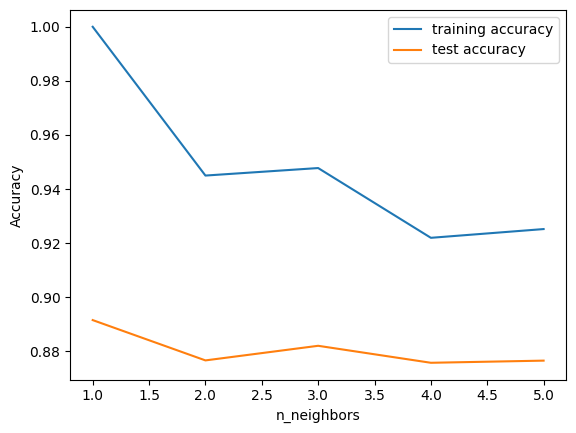

In [79]:
#KNN
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 6)
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [80]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
scores = cross_val_score(knn, X_train, y_train, cv=5)
knn_pred = knn.predict(X_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(knn.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, knn_pred)))
print(confusion_matrix(y_test, knn_pred))

Average cross validation score: 0.876
Test accuracy: 0.882
F1 score: 0.836
[[13898  1138]
 [ 1679  7163]]


In [81]:
#Decision Tree
tree = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
scores = cross_val_score(tree, X_train, y_train, cv=5)
tree_pred = tree.predict(X_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(tree.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, tree_pred)))
print(confusion_matrix(y_test, tree_pred))

Average cross validation score: 0.994
Test accuracy: 0.994
F1 score: 0.992
[[14898   138]
 [    0  8842]]


In [82]:
def classifier(train, test, estimator, param_grid):
    grid_search = GridSearchCV(estimator, param_grid, cv=5)
    grid_search.fit(train, y_train)
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)
    print("Test score: {:.3f}".format(grid_search.score(test, y_test)))

def feature_selection(model):
    select_features = SelectFromModel(estimator=model, threshold='median')
    select_features.fit(X_train, y_train)
    X_train_select = select_features.transform(X_train)
    X_test_select = select_features.transform(X_test)
    return X_train_select, X_test_select

def run_model(model, model_feature, param_grid):
    print("Before feature selection:")
    classifier(X_train, X_test, model, param_grid)
    X_train_select, X_test_select = feature_selection(model_feature)
    print("After feature selection")
    classifier(X_train_select, X_test_select, model, param_grid)

In [83]:
#Random Forest
param_grid = {'n_estimators':[50,75,100], 'max_depth':[1,2,5]}
run_model(RandomForestClassifier(), RandomForestClassifier(n_estimators=50, max_depth=2), param_grid)

Before feature selection:
Best parameters: {'max_depth': 5, 'n_estimators': 75}
Best score: 0.9978327353602607
Test score: 0.995
After feature selection
Best parameters: {'max_depth': 5, 'n_estimators': 100}
Best score: 0.9979374304097236
Test score: 0.998


In [84]:
#Gradient Boosted Classifier
param_grid = {'max_depth':[1,2,5], 'learning_rate':[1,0.1,0.001]}
run_model(GradientBoostingClassifier(), GradientBoostingClassifier(learning_rate=0.001), param_grid)

Before feature selection:
Best parameters: {'learning_rate': 0.1, 'max_depth': 5}
Best score: 0.9996021446713934
Test score: 0.999
After feature selection
Best parameters: {'learning_rate': 0.1, 'max_depth': 5}
Best score: 0.9995916751116383
Test score: 0.999


In [85]:
#Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
scores = cross_val_score(gnb, X_train, y_train, cv=5)
gnb_pred = gnb.predict(X_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(gnb.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, gnb_pred)))
print(confusion_matrix(y_test, gnb_pred))

Average cross validation score: 0.959
Test accuracy: 0.958
F1 score: 0.939
[[15006    30]
 [  983  7859]]


In [86]:
#Multi Layer Perceptron
mlp = MLPClassifier(hidden_layer_sizes=[35, 20], alpha=0.001, solver='adam', activation='relu')
mlp.fit(X_train_std, y_train)
mlp_pred = mlp.predict(X_test_std)
print("Train score: {:.3f}".format(mlp.score(X_train_std, y_train)))
print("Test accuracy: {:.3f}".format(mlp.score(X_test_std, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, mlp_pred)))
print(confusion_matrix(y_test, mlp_pred))

Train score: 1.000
Test accuracy: 0.999
F1 score: 0.999
[[15028     8]
 [   15  8827]]


In [87]:
#Adaboost Classifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
scores = cross_val_score(ada, X_train, y_train, cv=5)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(ada.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, ada_pred)))
print(confusion_matrix(y_test, ada_pred))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R

Average cross validation score: 1.000
Test accuracy: 0.999
F1 score: 0.999
[[15027     9]
 [    7  8835]]
